# Project 4

In this project, you will analyze the admissions data in detail and build a model and explain it. It is more open ended so feel free to use all the various techniques that you have learnt so far. 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

/Users/chandler/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [21]:
admissions = pd.read_csv('../../project-4/assets/admissions.csv')
columns = ['admit', 'gre', 'gpa', 'rank_1.0', 'rank_2.0', 'rank_3.0']
admissions = admissions.join(pd.get_dummies(admissions.prestige, prefix='rank'))
df = admissions[columns]
df.head()

,admit,gre,gpa,rank_1.0,rank_2.0,rank_3.0
0,0,380.0,3.61,0,0,1
1,1,660.0,3.67,0,0,1
2,1,800.0,4.00,1,0,0
3,1,640.0,3.19,0,0,0
4,0,520.0,2.93,0,0,0


In [23]:
df = df.dropna()

### What are the predictors and dependent variable ?

####  
predictors are the gre, gpa, and rank columns

### Intro: Write a problem Statement/ Specific hypothesis you have regarding admissions?

##### Hypothesis: 
The Prestige of undergrad school will be the largest predictor of admissions success. 

### Dataset:  Find the distribution of admission, GRE, GPA and Prestige

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c173804d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c17984910>]], dtype=object)

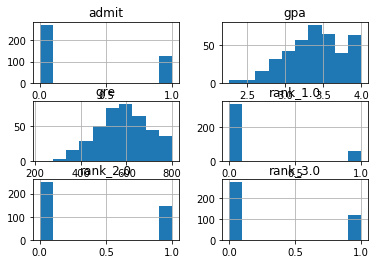

In [41]:
df.hist()

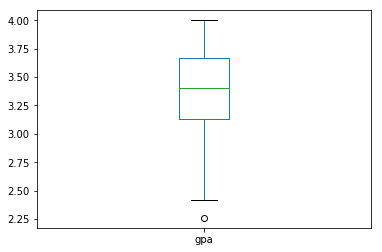

In [33]:
df.gpa.plot(kind='box')

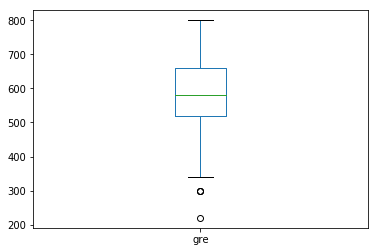

In [34]:
df.gre.plot(kind='box')

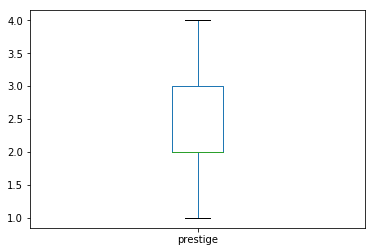

In [36]:
admissions.prestige.plot(kind='box')

/Users/chandler/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1a4eba50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c1b5aead0>]], dtype=object)

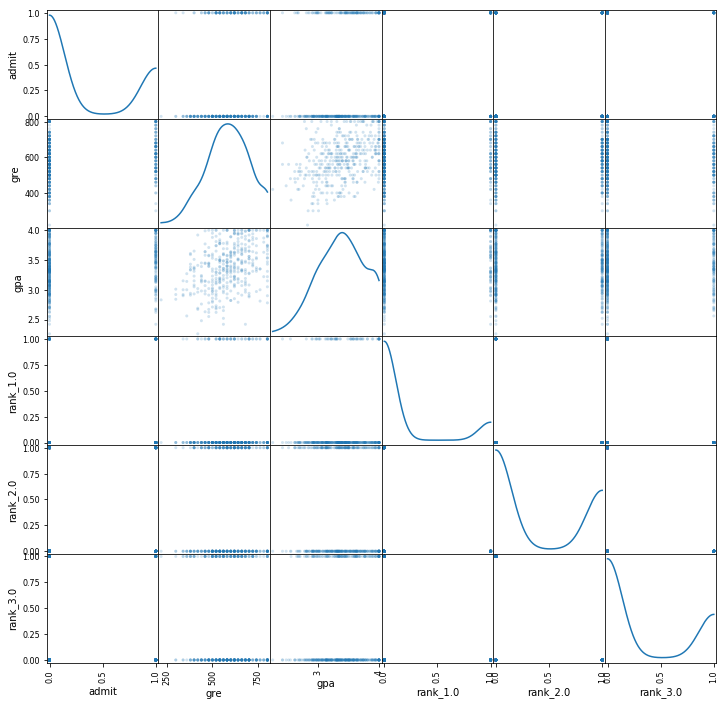

In [44]:
pd.scatter_matrix(df, alpha=0.2, figsize=(12, 12), diagonal='kde')

### FInd the correlation of each feature with admission

In [40]:
df.corrwith(df.admit)

admit       1.000000
gre         0.181202
gpa         0.174116
rank_1.0    0.204689
rank_2.0    0.067459
rank_3.0   -0.122302
dtype: float64

### How do you deal with the prestige feature?

create dummy variables

### What is the best model and that model's parameter's for predicting admission? Hint: Use GridsearchCV and define what metric you use to find what is best.

In [45]:
modeldata = df[['gre', 'gpa', 'rank_1.0', 'rank_2.0', 'rank_3.0']]
y = pd.DataFrame(df.admit)

In [46]:
lm = linear_model.LinearRegression().fit(modeldata, y)

In [48]:
from sklearn import grid_search

alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas,'fit_intercept':[True,False],'normalize':[True,False]},
    scoring='r2',cv=5)

gs.fit(modeldata, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'normalize': [True, False], 'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10]), 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [52]:
gs.best_estimator_.fit(modeldata,y).coef_

array([[ 0.0004075 ,  0.14222206,  0.26665046,  0.11736385, -0.0022779 ]])

### What is the most important feature that contributes to the students probability of admission? 

the best predictor is the undergrad admissions

### Visualize the model relative to prestige and GPA. HINT: Use the technique from the visualization of the flight delay model